Technique #1: Don’t load all the columns

Quite often the CSV you’re loading will include columns you don’t actually use when processing the data. If you don’t use them, there’s no point in loading them!

In [1]:
import pandas as pd
df = pd.read_csv("sample3.csv")
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 5 entries, Name to Departments
dtypes: int64(3), object(2)
memory usage: 1.5 KB


In [2]:
df = df[['Experience','Salary','Departments']]
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 3 entries, Experience to Departments
dtypes: int64(2), object(1)
memory usage: 880.0 bytes


Technique #2: Shrink numerical columns with smaller dtypes

Another technique can help reduce the memory used by columns that contain only numbers.

Each column in a Pandas DataFrame is a particular data type (dtype). For example, for integers there is the int64 dtype, int32, int16, and more.

Why does the dtype matter? First, because it affects what values you can store in that column:

int8 can store integers from -128 to 127.
int16 can store integers from -32768 to 32767.
int64 can store integers from -9223372036854775808 to 9223372036854775807.
Second, the larger the range, the more memory is used. For example, int64 uses 4× as much memory as int16, and 8× as much as int8.

By default when Pandas loads a CSV, it guesses at the dtypes. If it decides a column volumes are all integers, by default it assigns that column int64 as the dtype.

As a result, if you know that the numbers in a particular column will never be higher than 32767, you can use an int16 and reduce the memory usage of that column by 75%. And if the values will never be higher than 127, you can use an int8, using even less memory.

For example, here we see how much memory a column uses (the nbytes attribute) when loaded with the default int64 vs. when we load it with int8. We know that int8 won’t lose any data because the numbers in the column only range from 1 to 11:

In [27]:
df = pd.read_csv("sample3.csv")

In [5]:
df["age"].memory_usage(index=False, deep=True)

72

In [6]:
df["age"].max()

np.int64(31)

In [7]:
df["age"].min()

np.int64(21)

In [28]:
df = pd.read_csv("sample3.csv", dtype={"age": "int8","Experience": "int8","Salary": "int16"})

In [29]:
df["age"].memory_usage(index=False, deep=True)

9

8 times less

Technique #3: Shrink categorical data using Categorical dtypes

Imagine a gender column that only says "FEMALE", "MALE" over and over again—that’s a lot of memory being used to store the same three strings.

A more compact representation for data with only a limited number of values is a custom dtype called Categorical, whose memory usage is tied to the number of different values.

When we load the CSV, we can specify that a particular column uses this dtype, and the resulting memory usage is much smaller, 69KB instead of 550KB:

In [10]:
df1 = pd.read_csv('regression.csv')

In [11]:
set(df1["sex"])

{'Female', 'Male'}

In [12]:
df1["sex"].memory_usage(index=False, deep=True)


15058

In [13]:
df1 = pd.read_csv("regression.csv", dtype={"sex": "category"})

In [14]:
df1["sex"].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Female', 'Male']

In [15]:
df1["sex"].memory_usage(index=False, deep=True)

368

40 times less

Technique #4: Sparse series

If you have a column with lots of empty values, usually represented as NaNs, you can save memory by using a sparse column representation. It won’t waste memory storing all those empty values.

In [16]:
df2 = pd.read_csv("sample2.csv")

In [17]:
df2.memory_usage(index=False, deep=True)

Name          404
age            56
Experience     56
Salary         56
dtype: int64

In [18]:
len(df2)

7

In [19]:
len(df2.dropna())

3

We can convert the series to a sparse series, and then it’ll use less memory

In [20]:
sparse_series = df2.astype("Sparse[str]")

In [21]:
sparse_series

,Name,age,Experience,Salary
0,sourav,31.0,10.0,30000.0
1,sunil,30.0,NaN,25000.0
2,soyel,29.0,4.0,20000.0
3,souvik,24.0,3.0,20000.0
4,apurba,NaN,1.0,15000.0
5,pk,23.0,2.0,NaN
6,NaN,23.0,2.0,34000.0


In [22]:
len(sparse_series)

7

In [23]:
sparse_series.memory_usage(index=False, deep=True)

TypeError: a bytes-like object is required, not 'SparseArray'

Unfortunately it’s not yet possible to use read_csv() to load a column directly into a sparse dtype.

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    object  
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 11.8+ KB


In [25]:
df1 = pd.read_csv('regression.csv', nrows=10)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  10 non-null     float64
 1   tip         10 non-null     float64
 2   sex         10 non-null     object 
 3   smoker      10 non-null     object 
 4   day         10 non-null     object 
 5   time        10 non-null     object 
 6   size        10 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 688.0+ bytes


Reading data in chunks

In [37]:
data = pd.read_csv('regression.csv')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [67]:
data_chunks = pd.read_csv('regression.csv', chunksize=5) # each chunk contains 5 rows

In [68]:
data_chunks

In [71]:
for id, chunk in enumerate(data_chunks):
    globals()[f'df{id}'] = pd.DataFrame(chunk) # create dynamic variables

In [72]:
df0

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
df1

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [74]:
df2

,total_bill,tip,sex,smoker,day,time,size
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
12,15.42,1.57,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2


In [75]:
df3

,total_bill,tip,sex,smoker,day,time,size
15,21.58,3.92,Male,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
17,16.29,3.71,Male,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3


In [ ]:
%%time
chunks = pd.read_csv('.csv', iterator=True, chunksize=1000)




iterator=True: By setting iterator to True, we are creating a CSV file iterator. This means that the file is not fully loaded into memory at once but rather read in smaller chunks as needed.

In [34]:
#storing the chunks after iterating from chunk object
chunk_data=[chunk for chunk in data_chunks]

In [35]:
#concatnating dataframes to make it a complete dataset
train=pd.concat(chunk_data)

In [55]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Method 3 - Use Dask¶
- Dask is a flexible library for parallel computing in Python .
- Dask = Features of pandas + ( performance and scalability) .
Use when -

Manipulating large datasets, even when those datasets don’t fit in memory
Accelerating long computations by using many cores
Distributed computing on large datasets with standard Pandas operations like groupby, join, and time series computations

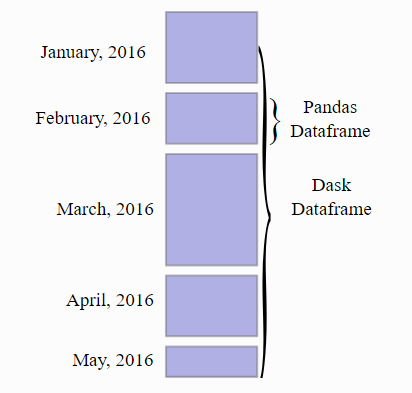

In [41]:
import dask.dataframe as dd

In [42]:
data = dd.read_csv("regression.csv")

ImportError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: pyarrow>=10.0.1 is required for PyArrow backed StringArray.

In [43]:
import pyarrow

In [44]:
pyarrow.__version__

'19.0.0'

Method 4 : Using Datatable¶

Datatable is a python library for manipulating tabular data. It supports out-of-memory datasets, multi-threaded data processing, and flexible API.

Similar to the R’s data.table
It is a toolkit for performing big data (up to 100GB) operations on a single-node machine, at the maximum possible speed

In [45]:
import datatable as dt

In [47]:
data = dt.fread("regression.csv")

Method 5 : Using cuDF¶

cuDf is GPU equivalent to pandas . cuDF is a package within the RAPIDS ecosystem that allows data scientists to easily migrate their existing Pandas workflows from CPU to GPU, where computations can leverage the immense parallelization that GPUs provide.

In [ ]:
# !pip3 install cudf


In [ ]:
%%time
import cudf
train = cudf.read_csv('regression.csv')

Method 6: Always delete unused variables ( this will save lot of space )

In [48]:
import gc # garbage collector
gc.collect()

1834

Method 7: Use Debug mode when doing feature engineering¶

In [49]:
dtypes = {
    "Name": "category",
    "age": "int8",
    "Experiene": "int8",
    "Salary": "int16",
    "Departments": "category"
}

In [50]:
debug = True
if debug:
    train = pd.read_csv('regression.csv' , dtype=dtypes)
else:
    train = pd.read_csv('regression.csv', dtype=dtypes) 

Method 8: Saving dataframes/objects as pickle files for faster loading

In [51]:
train.to_pickle("train.pkl")

In [53]:
df = pd.read_csv('sample.csv', usecols=['Experience','Salary'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Experience  6 non-null      int64
 1   Salary      6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


https://brightdata.com/

In [79]:
df.to_csv('train.csv')

using gzip

In [ ]:
%%time
df.to_csv('large2.csv.zip', compression='gzip', index=False)

In [ ]:
%%time
df2 = pd.read_csv('large2.csv.zip', compression='gzip')

using feather  need pyarrow

In [ ]:
df.to_feather('large2.csv')

In [ ]:
df2.read_csv('large2.csv')

python spae optimization
python spae optimization